In [1]:
%matplotlib notebook
%precision 3

from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 5]

import pandas

In [2]:
data=pandas.read_csv("vmstat.csv", delim_whitespace=True, skiprows=[0,2])
data["timestamp"]=pandas.to_datetime(data["Date"] + " "+data["time"],infer_datetime_format=True, utc=True)
data.set_index("timestamp", inplace=True)
data.tail()

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st,Date,time
timestamp,,,,,,,,,,,,,,,,,,,
2019-04-01 08:53:36+00:00,0,0,2592812,22813544,148048,3562752,0,0,256,36,2954,17522,7,3,90,0,0,2019-04-01,08:53:36
2019-04-01 08:53:37+00:00,0,0,2592812,22823324,148184,3551744,0,0,380,304,3421,16587,5,2,92,1,0,2019-04-01,08:53:37
2019-04-01 08:53:38+00:00,0,1,2592812,22821656,148192,3551476,28,0,384,712,1823,11671,3,2,94,0,0,2019-04-01,08:53:38
2019-04-01 08:53:39+00:00,1,0,2592556,23117588,148192,3551572,96,0,512,12,3547,15032,14,2,83,1,0,2019-04-01,08:53:39
2019-04-01 08:53:40+00:00,10,1,2592556,23077380,148216,3552284,80,0,504,352,3951,103138,18,6,75,1,0,2019-04-01,08:53:40


<IPython.core.display.Javascript object>


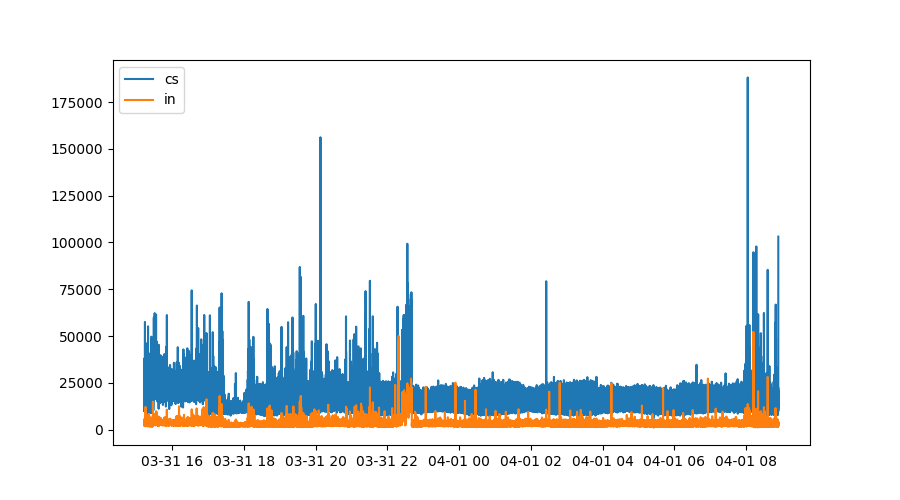

In [32]:
plt.figure()
plt.plot(data["cs"])
plt.plot(data["in"])
plt.legend()

<IPython.core.display.Javascript object>


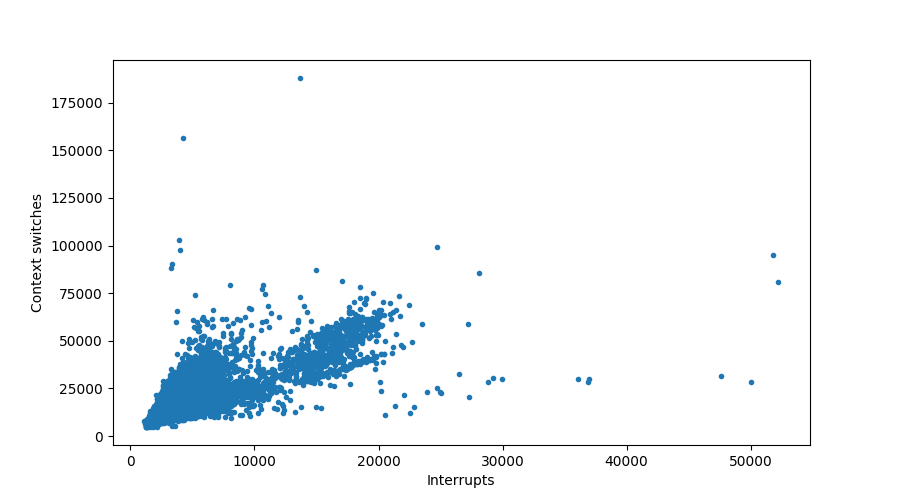

Text(0, 0.5, 'Context switches')

In [31]:
plt.figure()
plt.scatter(data["in"], data["cs"], marker='.')

plt.xlabel("Interrupts")
plt.ylabel("Context switches")

<IPython.core.display.Javascript object>


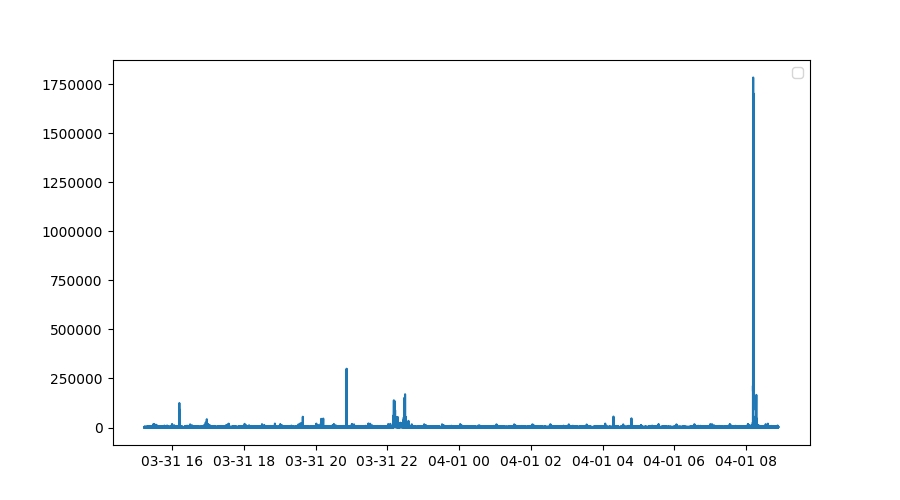

No handles with labels found to put in legend.


In [30]:
plt.figure()
plt.plot(data.bi+data.bo)
plt.legend()

<IPython.core.display.Javascript object>


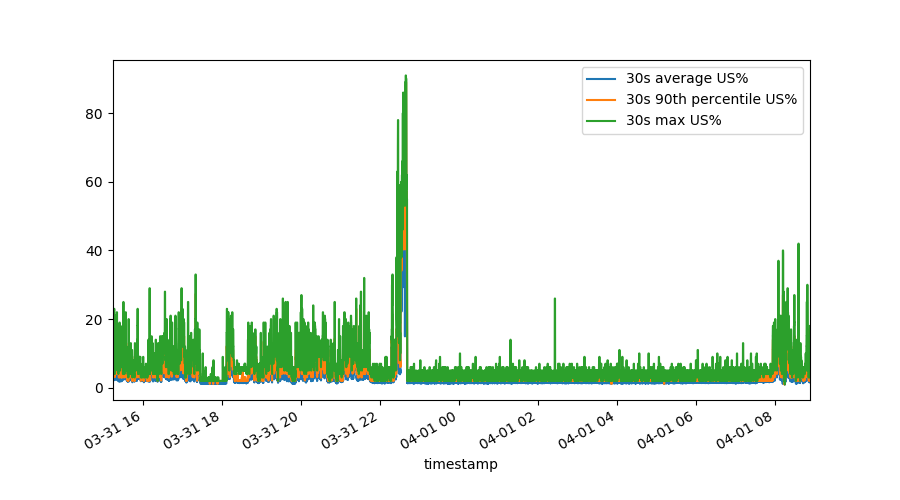

In [29]:
plt.figure()
period="30s"
rolledUS=data["us"].rolling(period)
rolledUS.mean().plot(label=period +" average US%")
rolledUS.quantile(0.9).plot(label=period +" 90th percentile US%")
rolledUS.max().plot(label=period +" max US%")

plt.legend()

<IPython.core.display.Javascript object>


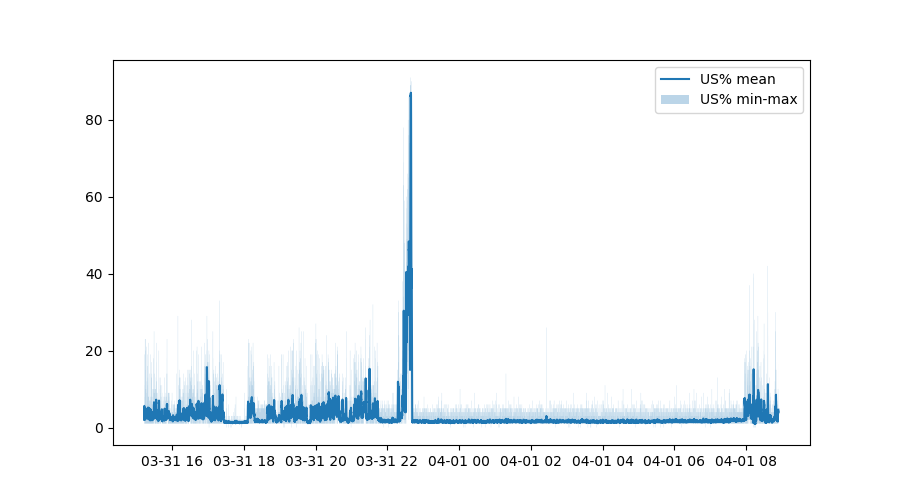

In [28]:
plt.figure()
plt.plot(rolledUS.mean(), label="US% mean")
plt.fill_between(data.index, 
                 rolledUS.min(), 
                 rolledUS.max(), 
                 alpha=0.3, label="US% min-max")
plt.legend()


In [8]:
data.describe()

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st
count,63572.000000,63572.000000,6.357200e+04,6.357200e+04,6.357200e+04,6.357200e+04,63572.000000,6.357200e+04,63572.000000,6.357200e+04,63572.000000,63572.000000,63572.000000,63572.000000,63572.000000,63572.000000,63572.0
mean,0.373105,0.131630,3.112707e+06,2.022793e+06,2.539552e+06,1.646153e+07,5.393129,7.065897e+01,390.865098,6.603065e+02,3117.293746,14332.279117,2.819543,1.244825,95.044532,0.953911,0.0
std,1.108096,1.759799,1.360348e+05,4.626619e+06,8.579239e+05,4.191127e+06,249.043681,8.562188e+03,3153.216485,8.799126e+03,1822.534031,6106.062058,5.198884,0.771309,6.939033,3.525543,0.0
min,0.000000,0.000000,2.592556e+06,2.013960e+05,1.560000e+03,3.955400e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,1109.000000,4500.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,3.030316e+06,4.196400e+05,1.857168e+06,1.524845e+07,0.000000,0.000000e+00,96.000000,0.000000e+00,2396.000000,11018.000000,1.000000,1.000000,95.000000,0.000000,0.0
50%,0.000000,0.000000,3.201324e+06,6.857240e+05,3.092638e+06,1.602734e+07,0.000000,0.000000e+00,164.000000,4.000000e+01,2759.000000,12642.500000,2.000000,1.000000,97.000000,0.000000,0.0
75%,0.000000,0.000000,3.205676e+06,1.364519e+06,3.278334e+06,1.871407e+07,0.000000,0.000000e+00,252.000000,4.760000e+02,3251.000000,15085.000000,2.000000,1.000000,98.000000,1.000000,0.0
max,28.000000,143.000000,6.922796e+06,3.054440e+07,3.909900e+06,2.435592e+07,47604.000000,1.562868e+06,299456.000000,1.564620e+06,52234.000000,188184.000000,91.000000,23.000000,99.000000,100.000000,0.0


In [9]:
data[data.r > 7]

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st,Date,time
timestamp,,,,,,,,,,,,,,,,,,,
2019-03-31 15:14:37+00:00,9,2,3017772,1559380,2170132,23808164,0,0,0,1832,3122,16065,5,2,92,1,0,2019-03-31,15:14:37
2019-03-31 15:15:11+00:00,9,0,3017772,1351536,2170244,23831396,0,0,140,0,3468,18089,6,2,92,0,0,2019-03-31,15:15:11
2019-03-31 15:17:09+00:00,8,0,3017772,1489824,2170584,23880356,0,0,152,328,6284,26617,21,3,73,3,0,2019-03-31,15:17:09
2019-03-31 15:18:00+00:00,9,0,3017772,1367572,2170776,23893160,0,0,136,1128,3261,18206,8,3,89,1,0,2019-03-31,15:18:00
2019-03-31 15:33:55+00:00,21,0,3017772,666924,2174464,24235100,0,0,416,1992,5156,24505,7,3,89,1,0,2019-03-31,15:33:55
2019-03-31 15:36:35+00:00,16,0,3017772,697740,2174944,24251292,0,0,264,0,2689,17393,3,2,95,0,0,2019-03-31,15:36:35
2019-03-31 15:47:55+00:00,10,0,3017772,533556,2166324,24132172,0,0,164,140,4020,30318,7,2,91,0,0,2019-03-31,15:47:55
2019-03-31 15:52:10+00:00,9,0,3017772,569336,2156220,24014160,0,0,192,0,2935,17228,3,1,96,0,0,2019-03-31,15:52:10
2019-03-31 15:58:36+00:00,8,0,3017772,690740,2156732,24081252,0,0,72,1312,2391,12990,2,1,97,0,0,2019-03-31,15:58:36


<IPython.core.display.Javascript object>


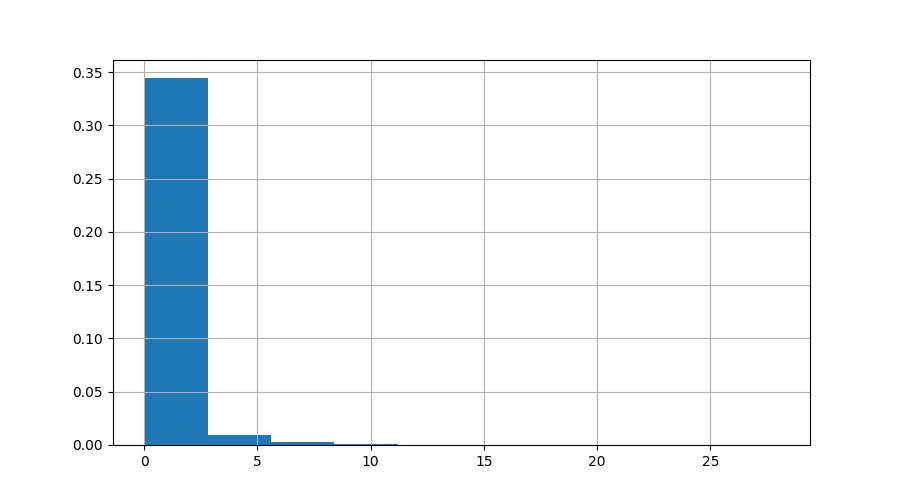

In [27]:
plt.figure()
data.r.hist(bins=10, density=True)

<IPython.core.display.Javascript object>


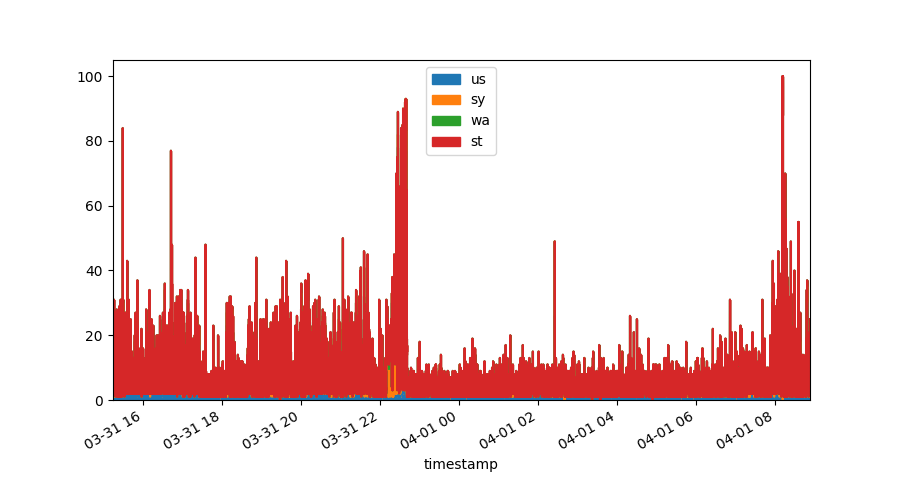

In [26]:
data[["us", "sy", "wa", "st"]].plot.area()

In [12]:
diskstat=pandas.read_csv("diskstat.csv", delim_whitespace=True)
diskstat["timestamp"]=pandas.to_datetime(diskstat["tstamp"],infer_datetime_format=True, unit='s', utc=True)
diskstat.set_index("timestamp", inplace=True)
diskstat.head()

,tstamp,maj,min,dev,reads,rdmerges,rdsectors,rdtime,writes,wrmerges,wrsectors,wrtime,ioprogess,iotime,wiotime,discards,discardmerges,discardsectors,discardtime
timestamp,,,,,,,,,,,,,,,,,,,
2019-03-31 15:46:36+00:00,1554047196,7,0,loop0,49965,0,102014,359580,0,0,0,0,0,13756,343156,NaN,NaN,NaN,NaN
2019-03-31 15:46:36+00:00,1554047196,7,1,loop1,11286,0,26630,17040,0,0,0,0,0,948,14980,NaN,NaN,NaN,NaN
2019-03-31 15:46:36+00:00,1554047196,7,2,loop2,6168,0,14420,6092,0,0,0,0,0,1472,2504,NaN,NaN,NaN,NaN
2019-03-31 15:46:36+00:00,1554047196,7,3,loop3,6221,0,14484,5916,0,0,0,0,0,504,1228,NaN,NaN,NaN,NaN
2019-03-31 15:46:36+00:00,1554047196,7,4,loop4,6226,0,14538,2472,0,0,0,0,0,276,356,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


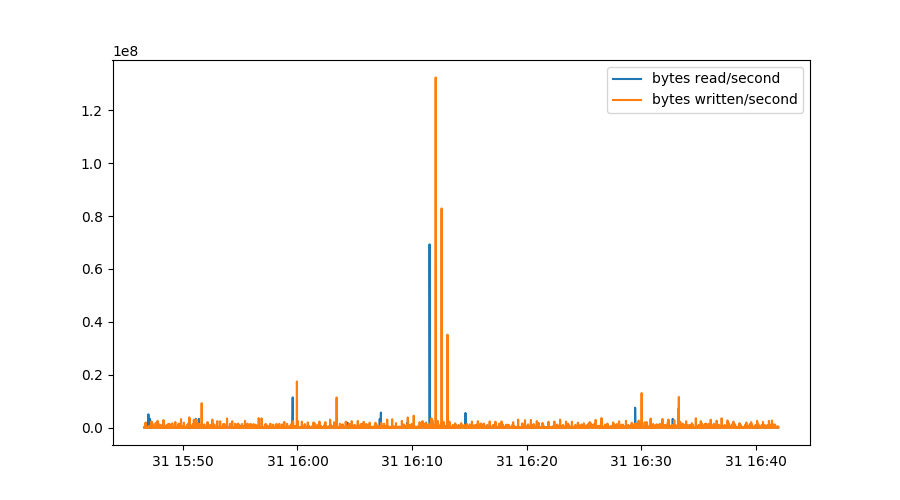

In [25]:
plt.figure()
sdb=diskstat[diskstat.dev=="sdb"]
plt.plot(sdb.index, 512*sdb.rdsectors.diff(), label="bytes read/second")
plt.plot(sdb.index, 512*sdb.wrsectors.diff(), label="bytes written/second")
plt.legend()

<IPython.core.display.Javascript object>


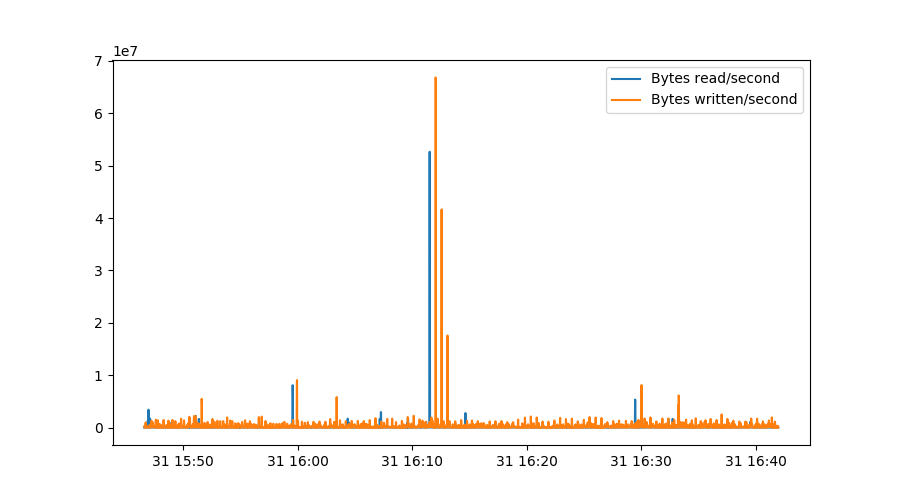

In [24]:
rdrate = 512*np.gradient(sdb.rdsectors, sdb.index.astype(np.int64)/1000000000)
wrrate = 512*np.gradient(sdb.wrsectors, sdb.index.astype(np.int64)/1000000000)

plt.figure()
plt.plot(sdb.index, rdrate, label="Bytes read/second")
plt.plot(sdb.index, wrrate, label="Bytes written/second")
plt.legend()

In [15]:
sdb.describe()

,tstamp,maj,min,reads,rdmerges,rdsectors,rdtime,writes,wrmerges,wrsectors,wrtime,ioprogess,iotime,wiotime,discards,discardmerges,discardsectors,discardtime
count,3.315000e+03,3315.0,3315.0,3.315000e+03,3.315000e+03,3.315000e+03,3.315000e+03,3.315000e+03,3.315000e+03,3.315000e+03,3.315000e+03,3315.000000,3.315000e+03,3.315000e+03,0.0,0.0,0.0,0.0
mean,1.554049e+09,8.0,16.0,2.040620e+07,2.090995e+06,6.356264e+08,1.268518e+08,5.002553e+07,3.954939e+07,1.575164e+09,9.997507e+08,1.848869,1.428825e+08,1.126700e+09,NaN,NaN,NaN,NaN
std,9.596032e+02,0.0,0.0,1.657212e+03,2.922732e+01,1.591600e+05,1.538281e+04,1.922830e+04,1.416018e+04,7.009871e+05,1.641531e+06,14.219137,5.483439e+04,1.656226e+06,NaN,NaN,NaN,NaN
min,1.554047e+09,8.0,16.0,2.040213e+07,2.090905e+06,6.353791e+08,1.268126e+08,4.999209e+07,3.952501e+07,1.574070e+09,9.969637e+08,0.000000,1.427860e+08,1.123873e+09,NaN,NaN,NaN,NaN
25%,1.554048e+09,8.0,16.0,2.040433e+07,2.090957e+06,6.354665e+08,1.268333e+08,5.000931e+07,3.953709e+07,1.574504e+09,9.983693e+08,0.000000,1.428337e+08,1.125300e+09,NaN,NaN,NaN,NaN
50%,1.554049e+09,8.0,16.0,2.040727e+07,2.091013e+06,6.357391e+08,1.268594e+08,5.002629e+07,3.954984e+07,1.575392e+09,9.998877e+08,0.000000,1.428877e+08,1.126844e+09,NaN,NaN,NaN,NaN
75%,1.554050e+09,8.0,16.0,2.040751e+07,2.091015e+06,6.357555e+08,1.268642e+08,5.004207e+07,3.956079e+07,1.575760e+09,1.001105e+09,0.000000,1.429273e+08,1.128067e+09,NaN,NaN,NaN,NaN
max,1.554051e+09,8.0,16.0,2.040827e+07,2.091016e+06,6.358064e+08,1.268725e+08,5.005895e+07,3.957552e+07,1.576277e+09,1.002856e+09,159.000000,1.429836e+08,1.129826e+09,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


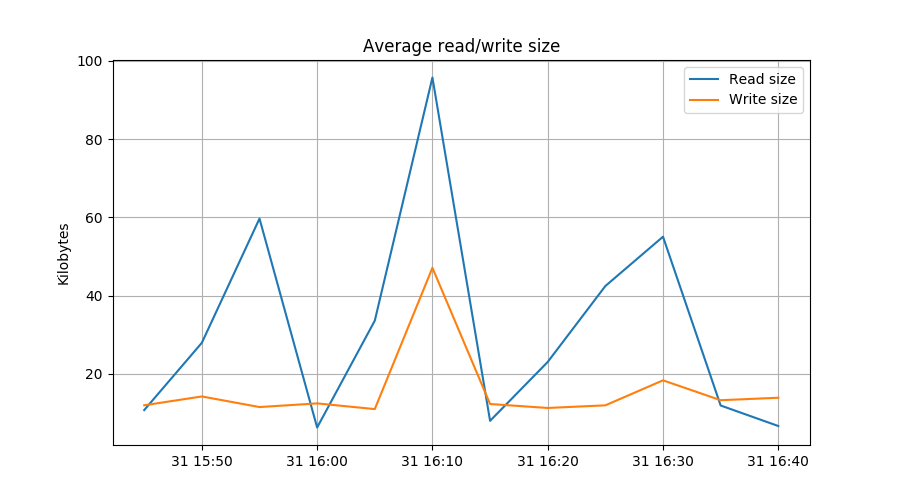

Text(0.5, 1.0, 'Average read/write size')

In [23]:
reads=sdb.reads.diff().resample("300s").mean()
rdbytes=512*sdb.rdsectors.diff().resample("300s").mean()
writes=sdb.writes.diff().resample("300s").mean()
wrbytes=512*sdb.wrsectors.diff().resample("300s").mean()

plt.figure()
plt.plot(rdbytes/reads/1024, label="Read size")
plt.plot(wrbytes/writes/1024, label="Write size")
plt.grid()
plt.legend()
plt.ylabel("Kilobytes")
plt.title("Average read/write size")

In [17]:
grouped = diskstat.groupby("dev").iotime
(grouped.max() - grouped.min()).sort_values()

dev
loop0         0
sdb3          0
sdb1          0
sda1          0
sdc2          0
loop7         0
sda           0
loop5         0
loop4         0
loop3         0
loop2         0
loop6         0
sdc5         36
loop1        44
sdc1       7376
sdc        7412
sdb2     188452
sdb      197592
Name: iotime, dtype: int64

In [18]:
diskstat[diskstat.dev=="sdb"].wrsectors.diff().quantile(0.99)

5764.239999999983

In [19]:
diskstat.query('dev=="sdb"').wrsectors.diff().quantile(0.99)

/home/ahu/.local/lib/python3.6/site-packages/pandas/core/generic.py:407: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  s = level_values.to_series()
/home/ahu/.local/lib/python3.6/site-packages/pandas/core/generic.py:415: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  dindex = axis_index.to_series()


5764.239999999983

In [20]:
diskstat[(diskstat.dev=="sdb") & (diskstat.ioprogess==0)].wrsectors.diff().quantile(0.99)


6544.0

In [21]:
d = {'index': diskstat.index.array, 'dev': diskstat.dev.array, 'reads': diskstat.reads.array, 'writes': diskstat.writes.array}
df = pandas.DataFrame(data=d)
df

,index,dev,reads,writes
0,2019-03-31 15:46:36+00:00,loop0,49965,0
1,2019-03-31 15:46:36+00:00,loop1,11286,0
2,2019-03-31 15:46:36+00:00,loop2,6168,0
3,2019-03-31 15:46:36+00:00,loop3,6221,0
4,2019-03-31 15:46:36+00:00,loop4,6226,0
5,2019-03-31 15:46:36+00:00,loop5,4621,0
6,2019-03-31 15:46:36+00:00,loop6,28686,0
7,2019-03-31 15:46:36+00:00,loop7,10,0
8,2019-03-31 15:46:36+00:00,sda,342952,80257
9,2019-03-31 15:46:36+00:00,sda1,342889,80253
